In [17]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split as tts
from sklearn.metrics import ConfusionMatrixDisplay,roc_auc_score,RocCurveDisplay,classification_report
from sklearn.preprocessing import StandardScaler

### <span style="color: yellow;">Loading The DATA</span>

In [2]:
file='../Social_Network_Ads.csv'
data=pd.read_csv(file)
print(data.dtypes,'\n\nShape->',data.shape)
data.head()

Age                int64
EstimatedSalary    int64
Purchased          int64
dtype: object 

Shape-> (400, 3)


,Age,EstimatedSalary,Purchased
0,19,19000,0
1,35,20000,0
2,26,43000,0
3,27,57000,0
4,19,76000,0


### <span style="color: yellow;">Preprocessing</span>

In [5]:
data.isna().sum()
#No missings observed

Age                0
EstimatedSalary    0
Purchased          0
dtype: int64

In [8]:
#Splitting the Data
inputs=np.array(data.drop('Purchased',axis=1))
target=np.array(data['Purchased']).reshape(len(data),1)
x_train,x_test,y_train,y_test=tts(inputs,target,random_state=42,stratify=target,test_size=0.25)

In [12]:
#Standardizing
standard_scaler=StandardScaler().fit(x_train)
x_train=standard_scaler.transform(x_train)
x_test=standard_scaler.transform(x_test)

### <span style="color: yellow;">Fitting The Model</span>

In [14]:
knc=KNeighborsClassifier()
knc.fit(x_train,y_train)
y_pred=knc.predict(x_test)

c:\Users\mmopa\anaconda3\Lib\site-packages\sklearn\neighbors\_classification.py:228: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


### <span style="color: yellow;">Evaluation</span>

In [22]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.92      0.94      0.93        64
           1       0.89      0.86      0.87        36

    accuracy                           0.91       100
   macro avg       0.90      0.90      0.90       100
weighted avg       0.91      0.91      0.91       100



In [23]:
print('ROC SCORE: ',roc_auc_score(y_test,y_pred))

ROC SCORE:  0.8993055555555556


### <span style="color: yellow;">Visualization</span>

<Figure size 640x480 with 0 Axes>

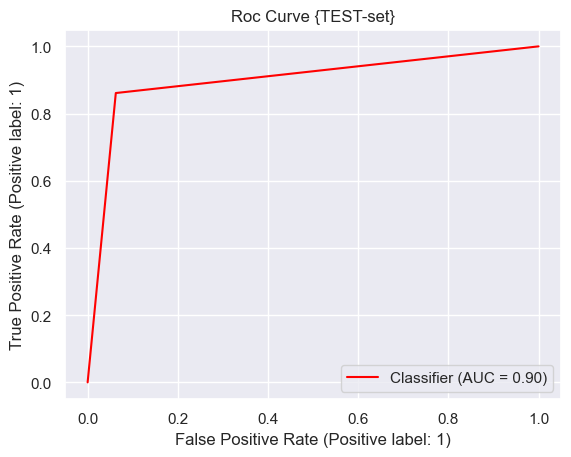

In [19]:
plt.figure()
RocCurveDisplay.from_predictions(y_test,y_pred,color='red')
plt.title('Roc Curve {TEST-set}')
plt.show()

<Figure size 640x480 with 0 Axes>

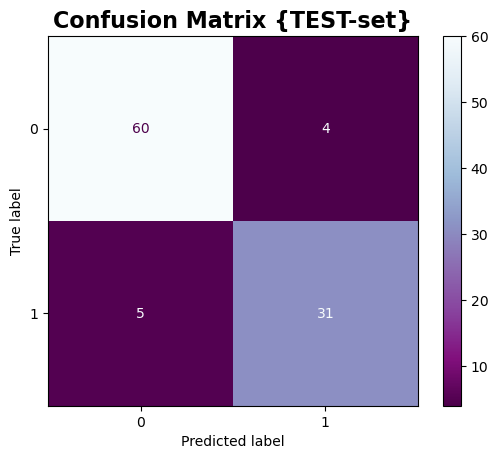

In [21]:
sns.reset_defaults()
plt.figure()
ConfusionMatrixDisplay.from_predictions(y_test,y_pred,cmap='BuPu_r')
plt.title('Confusion Matrix {TEST-set}',fontweight='bold',fontsize=16)
plt.show()